# Final Project 

#####                 Pravina Pidikiti, Jasmine Kinchen, and Tanisha Fleming contributed to this code.

In [208]:
#Import necessary modules
import random
from copy import copy
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np
import pandas as pd 

## - Defining each class function.

In [209]:
#Define the individual class.

#not sure if the list of different phenotypes should be used for individual or population 
#project says each population should have inidividuals with same phenotype 
colors = ["red", "orange", "yellow", "green", "blue", "purple"]

class individual:
    # Add a docstring 
    '''Function to create individuals'''
    def __init__(self,id ="1", x= "0",y= "0",colorNumber = 0): # Add default values and color phenotype.
        # Add a docstring
        self.id = id
        self.x = x
        self.y = y
        self.colorNumber = colors[colorNumber]

In [210]:
#Define the population class.

colors = ["red", "orange", "yellow", "green", "blue", "purple"]

class population:

  def __init__(self,id ="1",popSize = 50 ,colorNumber = 0): # Add default values and starting population size.
        # Add a docstring
        '''Function to create individuals and apply color'''
        self.id = id
        self.popSize = popSize
        self.colorNumber = colors[colorNumber]
        self.pop=[] #create list of individuals

        for i in range(popSize):
          #this will assign the population color to the individual color
          if(i == 0):
            newInd = individual(colorNumber = colorNumber) 
          else:
            newInd = individual(id = i +1, colorNumber = colorNumber)  
          self.pop.append(newInd) 

  def addInd(self,newInd):
      self.pop.append(newInd)
  def removeInd(self,newInd):
      self.pop.remove(newInd)
                
#calculate and print the frequency of phenotypes among individuals.
#Python program to count the frequency of  
#individuals in a list using a dictionary 
  
  def phenotypeFreq(self): #newPop or population.
    '''Function to count phenotype frequencies'''

    # Creating an empty dictionary  
    freq = {"red":0,"yellow":0,"green":0,"blue":0,"purple":0,"orange":0} 
    for newInd in self.pop: 
        if newInd.colorNumber not in freq: #if color not already in dictionary add it with a count of 1 
          freq.update({newInd.colorNumber:1})
        elif newInd.colorNumber in freq: 
          freq[newInd.colorNumber] += 1 #increase number due to color occuring more than once 
        
    
    for k, v in freq.items(): 
        print ("% s : % d"%(k, v))

    phenfreqList=[]

    #need to take the values for all the keys and divide by the total number of individuals 
    #value / len(newPop.list)
    for i in freq.keys():
        phenFreq = freq[i] / len(self.pop)
        phenfreqList.append(phenFreq)
        
    return  phenfreqList
        #print("Phenotype Color %s has a frequency of %f" % (i,phenFreq))
    
  def sizePlot(self):#creating a method for plotting population size using a dictionary
    '''Function to help plot population size'''
    freq = {"red":0,"yellow":0,"green":0,"blue":0,"purple":0,"orange":0}
    for newInd in self.pop: 
        if newInd.colorNumber not in freq: #if color not already in dictionary add it with a count of 1 
          freq.update({newInd.colorNumber:1})
        elif newInd.colorNumber in freq: 
          freq[newInd.colorNumber] += 1 #increase number due to color occuring more than once 
        
    sizePlotList=[] #Creating list of populations for plot
    
    for k, v in freq.items(): 
        sizePlotList.append("% s : % d"%(k, v))
        print ("% s : % d"%(k, v))
    return sizePlotList

In [211]:
#Define the landscape class.
class landscape:
  #add dosctring
  def __init__(self,landscapeSize=3,dispersalMatrix = None): #Add default values.
    # Add a docstring
    '''Function to apply probablity of movement between populations'''
    self.landscapeSize = landscapeSize
    self.land=[] #create list of populations
    self.dispersalMatrix = [[0.4,0.3,0.2],[0.5,0.4,0.8],
                           [0.3,0.6,0.2]]

    for i in range(landscapeSize): #for every population in the landscape
        #create a a population object that will pick the color phenotype from the colors list
        #when i has already used white, it will restart to red for the next population to be created 
      if i == 0:
          newPop = population(colorNumber = i % len(colors)) 
      else:
          newPop = population(id = i + 1, colorNumber = i % len(colors))  
        
      self.land.append(newPop)  #add the population just created into the landscape list with the populations
    
  def move(self): #Creating a move method.
      for i in range(len(self.land)):
          indRemoval = []
          newPop = None
          for ind in self.land[i].pop:
              newPop = random.choices(self.land, weights = self.dispersalMatrix[i])[0]
          if newPop != self.land[i]:
              indRemoval.append(ind)
          
          for ind in indRemoval:
              self.land[i].removeInd(ind)
              newPop.addInd(ind)

In [212]:
#test code here 
#class phenotypeFreq:
 # myLandscape = landscape()
  #myLandscape.move()
 # def phenotypeFreq(self):
   # for i in myLandscape.land:
    # phenotypeFreq(myLandscape.land[i])
    #random.shuffle(phenotypeFreq)

myLandscape = landscape()
for i in range(100):
  myLandscape.move()
  
for populationObj in myLandscape.land:
    populationObj.phenotypeFreq()

red :  46
yellow :  0
green :  0
blue :  0
purple :  0
orange :  1
red :  4
yellow :  6
green :  0
blue :  0
purple :  0
orange :  49
red :  0
yellow :  44
green :  0
blue :  0
purple :  0
orange :  0


### - Creating plots of phenotype frequencies and population size.

red :  50
yellow :  0
green :  0
blue :  0
purple :  0
orange :  0


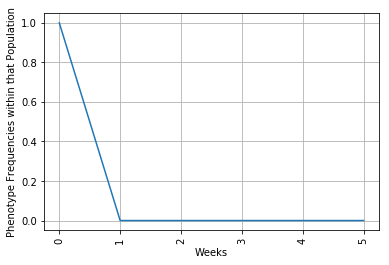

red :  0
yellow :  0
green :  0
blue :  0
purple :  0
orange :  49


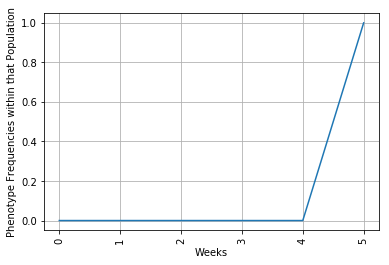

red :  0
yellow :  50
green :  0
blue :  0
purple :  0
orange :  1


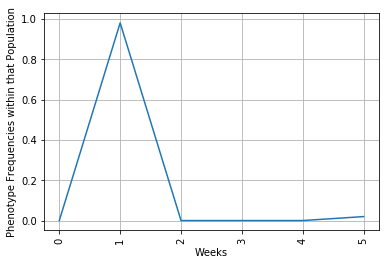

In [213]:
#Code to create plots of phenotype frequencies that shows three different lines
#for different populations.
 
Tropics=landscape() #create new landscape called Tropics
Tropics.move() 
for i in Tropics.land:
    phenfreqList = i.phenotypeFreq()
    #for j in phenfreqList:
    plt.plot([0,1,2,3,4,5],phenfreqList)
    plt.xlabel('Weeks') #creating x axis label
    plt.ylabel('Phenotype Frequencies within that Population') #creating y axis label where it 
    plt.xticks(rotation=90)
    plt.grid(True) #adding a grid
    plt.show()  


red :  49
yellow :  0
green :  0
blue :  0
purple :  0
orange :  0
red :  1
yellow :  0
green :  0
blue :  0
purple :  0
orange :  50
red :  0
yellow :  50
green :  0
blue :  0
purple :  0
orange :  0


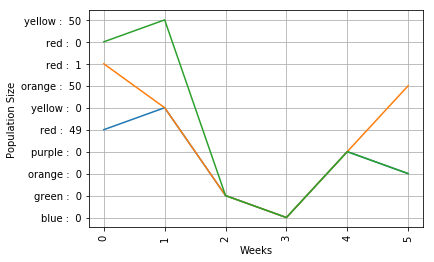

In [215]:
#Code to create plots of population sizes that shows three different lines
#for three different populations.

Beach=landscape() #create new landscape called Beach 
Beach.move()

for i in Beach.land:
    sizePlotList= i.sizePlot()
    #for j in phenfreqList:
    plt.plot([0,1,2,3,4,5],sizePlotList)
    plt.xlabel('Weeks') #creating x axis label
    plt.ylabel('Population Size') #creating y axis label where it
    plt.xticks(rotation=90)
    plt.grid(True) #adding a grid
    plt.show
    #y axis is suppose to have scale of 0-20 to represent population size. Did not know how to change that.

# Questions:


1. The effect the overall frequencies in phenotype seems consistent. Within the simulations we noticed that each population remained basically intact as far as phenotype frequencies throughout the weeks. There was some movement of 1 or 2 individuals into another population shown by the loss of some individuals.  

2. The overall rate of migration produced a a downward bell curve. It seems as if the each population reached its lowest size in the middle of the time duration but started off and ended with a greater population.Therefore,the overall increased in the rate of movement changes the overall population as time progresses 

3. When the movement probabilities are not symmetric,populations will have more individuals going in other populations and less individuals going out populations, therefore, populations sizes will be unequal.

4. When changing the population size, we noticed population sizes will cause the trajectory of phenotype frequencies to be unequal for different amounts of time. When you have larger population sizes, there’s more movement of individuals so theirs an unequal number of phenotypes for a longer time. The opposite will happen for smaller population sizes.



##### Note:This is the full code in its entirety. The document on Github that shows the contributions does not show the Jupyter notebook version of this code only the raw version. I posted the entire code so that it would be easier to read in the Jupyter view.